# Data exploration playground

* $N$: number of events (e.g. 130000)
* $V$: total number of voxels (e.g. 45x1x8 = 6480)
* $E_{i}=1,\dots,N$: incident energy
* $\pmb{x}_{i}\in \mathbb{R}^V$ energy deposits across voxels
* `showers.hdf5` file containes numpy array of shape (N, V)
* `incident_energes.hdf5` file containes numpy array of shape (N, 1)

$$
\pmb{E} = 
\begin{bmatrix}
E_1\\
E_2\\
\vdots\\
E_N
\end{bmatrix},
\ \ \ 
X = 
\begin{bmatrix}
\ \pmb{x}^t_1 \\
\ \pmb{x}^t_2 \\
\vdots\\
\ \pmb{x}^t_N 
\end{bmatrix}
$$

$$
\pmb{x}_i = f(E_i,\ angle_i,;\ pid_j,\ geometry_j),\quad i=1,..,N,\quad j={1,2,3,4}
$$

## Load dataset

In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import sys
sys.path.append('../CaloChallenge/code/')
from HighLevelFeatures import HighLevelFeatures as HLF

# === Path to your dataset ===
filename = "../calo-data/dataset_1_photons_1.hdf5"  # change this to your file

# === Open the HDF5 file ===
with h5py.File(filename, "r") as f:
    print("Available datasets:", list(f.keys()))
    
    # Load the datasets
    showers = f["showers"][:]          # shape (N_events, N_voxels)
    incident_energies = f["incident_energies"][:]  # shape (N_events,)

print("Showers shape:", showers.shape)
print("Incident energies shape:", incident_energies.shape)

HLF_1_photons = HLF('photon', filename='../calochallenge/code/binning_dataset_1_photons.xml')

df_energies = pd.DataFrame(incident_energies)
df_showers = pd.DataFrame(showers)
# for i in range(0,368):
#     showers[:,i] = (i+1)*0.001

Available datasets: ['incident_energies', 'showers']
Showers shape: (121000, 368)
Incident energies shape: (121000, 1)


FileNotFoundError: [Errno 2] No such file or directory: '../calochallenge/code/binning_dataset_1_photons.xml'

## Preview a single shower

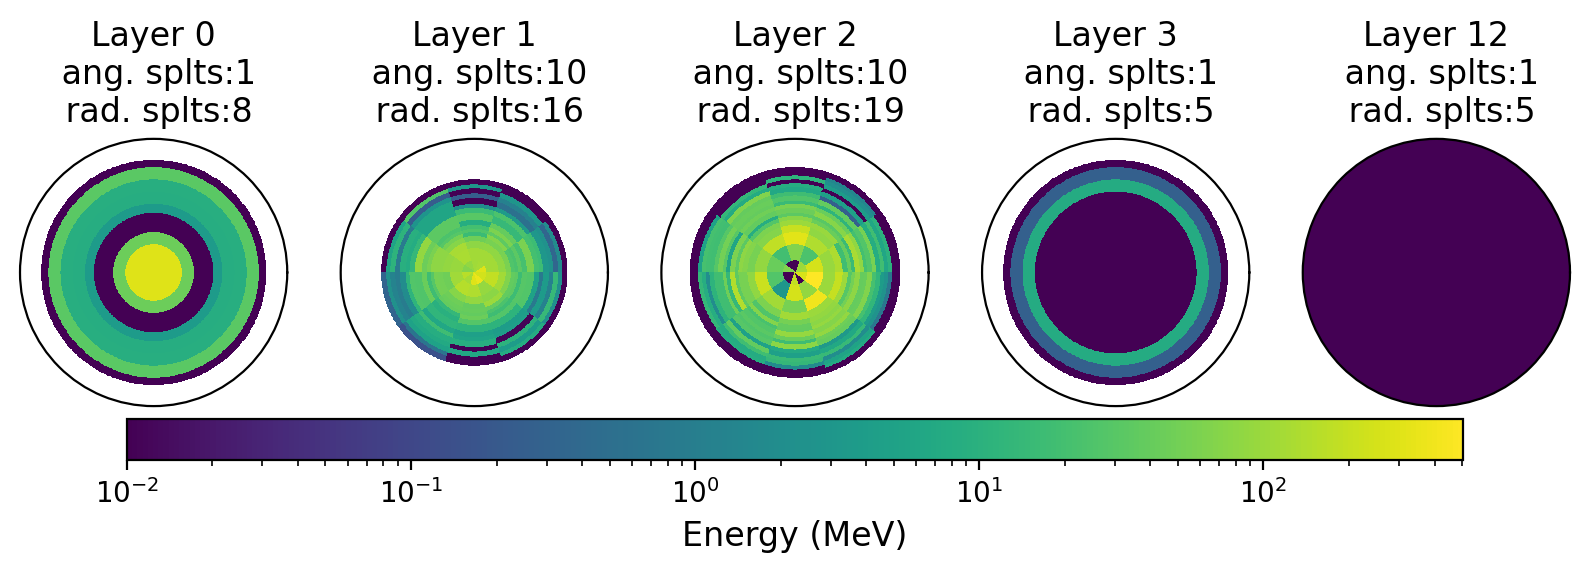

(0.0, 368.0)

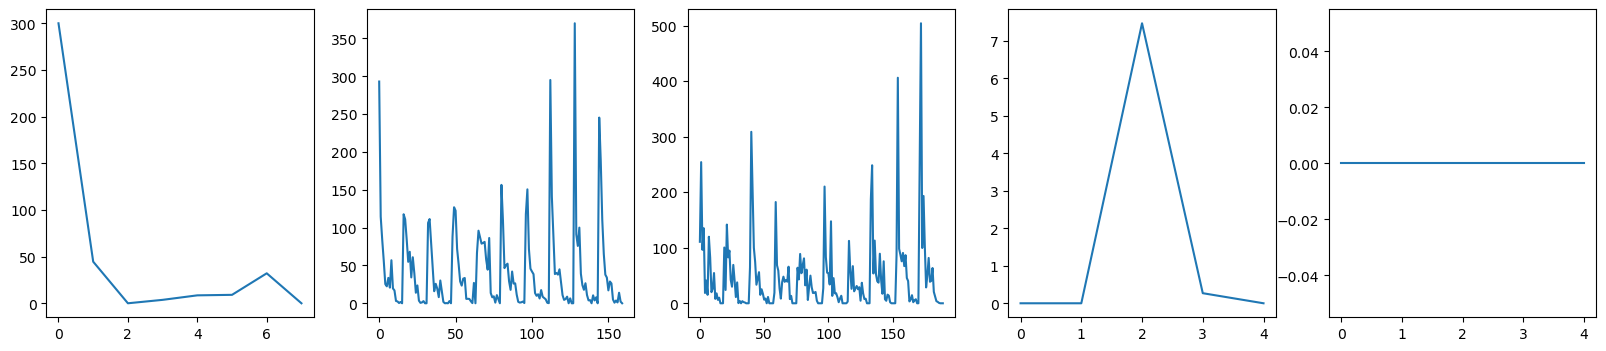

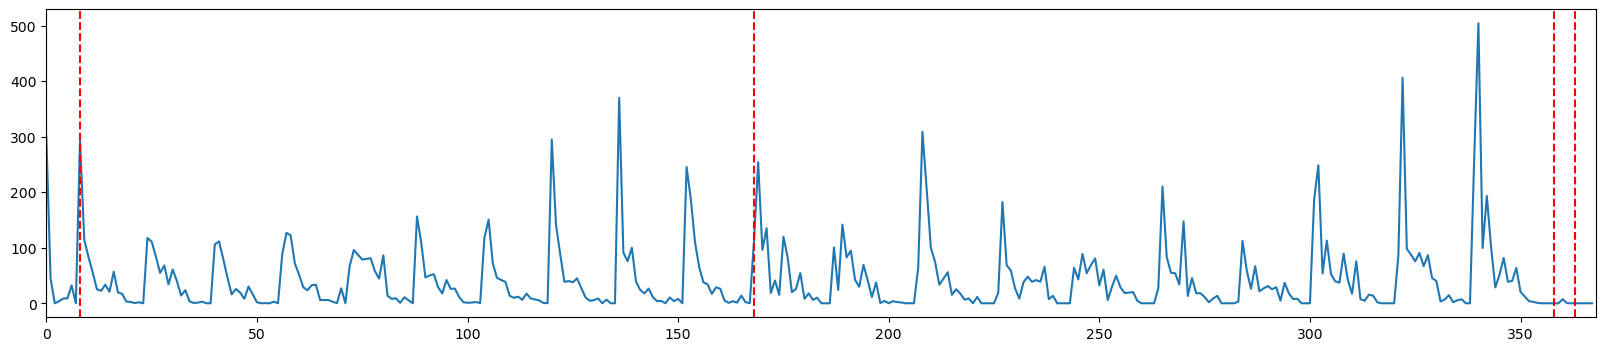

In [ ]:
i_idx = 0 # incident id

HLF_1_photons.DrawSingleShower(showers[i_idx])

num_layers = len(HLF_1_photons.relevantLayers)

plt.figure(figsize=(20,4))
lr_bound = np.unique(HLF_1_photons.bin_edges)
for lr_idx in range(0,num_layers):
    plt.subplot(1,5, lr_idx+1)
    shower = showers[i_idx, lr_bound[lr_idx]:lr_bound[lr_idx+1]]
    plt.plot(shower)

plt.figure(figsize=(20,4))
shower = showers[i_idx, :]
plt.plot(shower)
for lr_idx in range(0,num_layers):
    plt.axvline(x=lr_bound[lr_idx], color='red', linestyle='--')
plt.xlim(0,368)

## Average shower for Energy Level

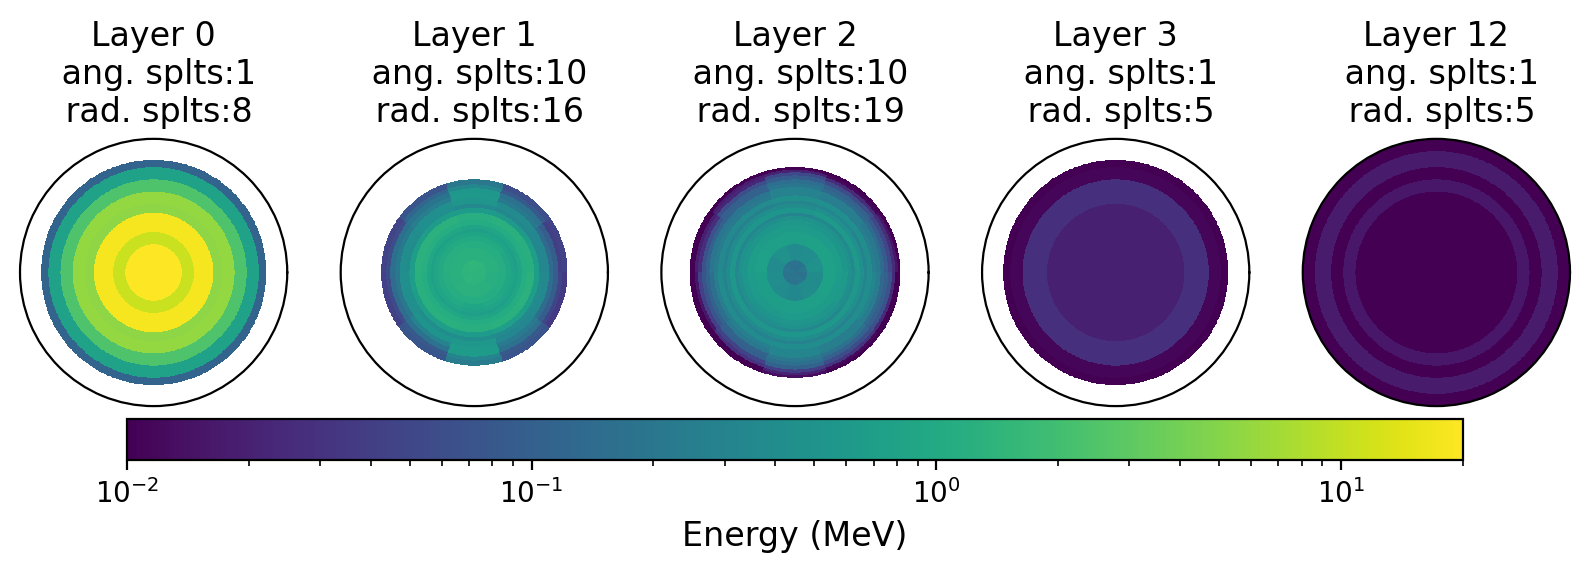

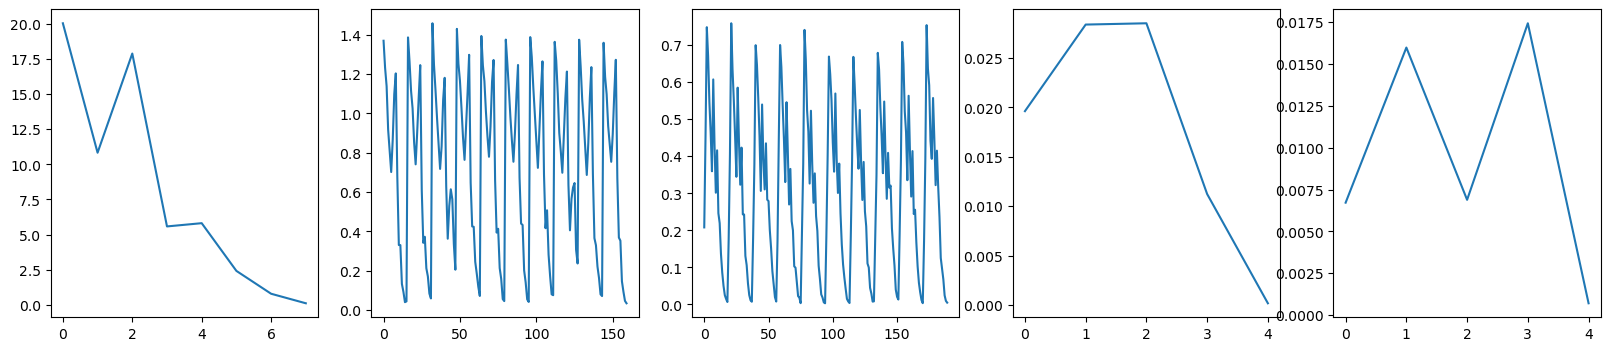

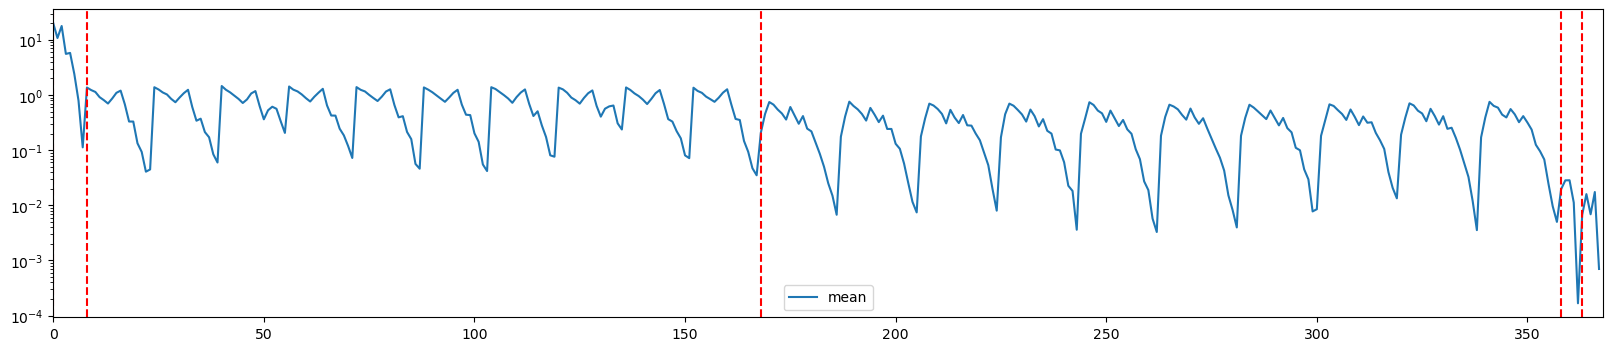

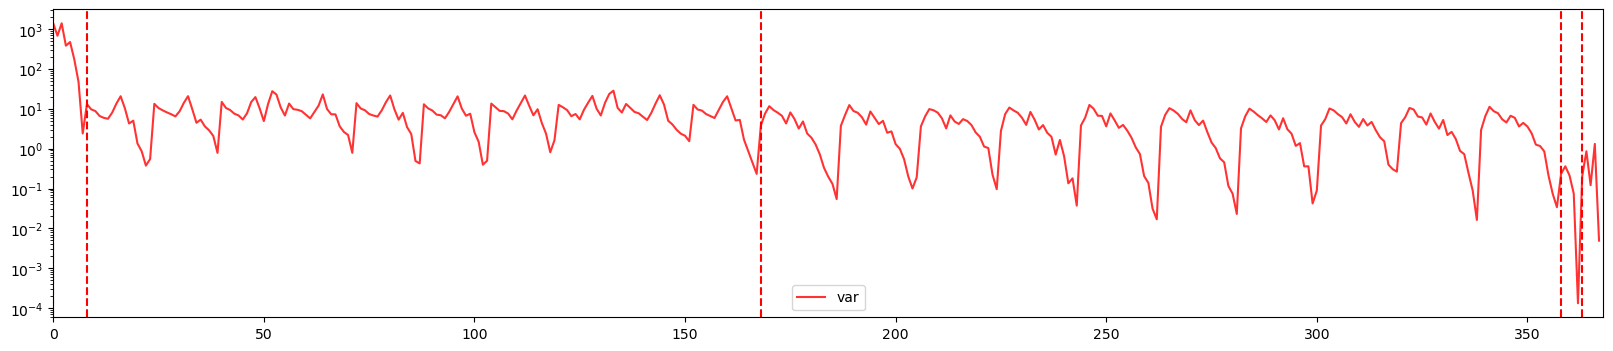

In [4]:
nrg_lvls = np.unique(incident_energies)

nrg_lvl = nrg_lvls[0]
i_idx = np.where(incident_energies == nrg_lvl)[0]

HLF_1_photons.DrawAverageShower(showers[i_idx])

plt.figure(figsize=(20,4))
lr_bound = np.unique(HLF_1_photons.bin_edges)
for lr_idx in range(0,num_layers):
    plt.subplot(1,num_layers, lr_idx+1)
    shower = np.mean(showers[i_idx, lr_bound[lr_idx]:lr_bound[lr_idx+1]],axis=0)
    plt.plot(shower)

# Plot mean
plt.figure(figsize=(20,4))
shower = showers[i_idx, :]
plt.semilogy(np.mean(shower,axis=0),label="mean")
for lr_idx in range(0,num_layers):
    plt.axvline(x=lr_bound[lr_idx], color='red', linestyle='--')
plt.xlim(0,368)
plt.legend()

# Plot variance
plt.figure(figsize=(20,4))
shower = showers[i_idx, :]
plt.semilogy(np.var(shower,axis=0),'r',alpha=0.8,label='var')
for lr_idx in range(0,num_layers):
    plt.axvline(x=lr_bound[lr_idx], color='red', linestyle='--')
plt.xlim(0,368)
plt.legend()